**ПРАКТИЧЕСКАЯ РАБОТА 8. ОСНОВЫ ОБУЧАЕМЫХ АЛГОРИТМОВ**

Коршиков Иван Сергеевич ПИН-б-о-22-1 09.03.03 Прикладная информатика

Цель работы: научиться применять простейшие обучаемые алгоритмы с использованием экосистемы Python. Задачи лабораторной работы: – научиться проводить визуальный анализ данных; – научиться создавать обучаемые алгоритмы (на примере регрессии).

In [ ]:
import requests
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/enikolaev/IT-and-Programming/refs/heads/main/data/pract8/pr8_09.txt"

response = requests.get(url)

with open('pr8_09.txt', 'wb') as file:
    file.write(response.content)

In [ ]:
f  = open("pr8_09.txt")
s = f.readlines()
x =[]
y =[]
for line in s:
    # print(line, type(line))
    d = line.strip().split(' ')
    x.append(float(d[0]))
    y.append(float(d[1]))

print(x, "\n", y)

[0.5, 2.38, -1.02, -1.97, 1.02, -0.2, -1.39, 2.84, 1.25, 0.27, 1.13, -2.33, -0.07, -1.31, 0.28, -0.09, 0.8, -0.57, 1.83, 2.02, 0.24, 0.23, -0.02, -1.21, -0.28, 1.61, -1.89, -1.12, -0.08, 0.99, -1.16, -0.68, -0.79, -0.09, 1.32, -0.65, -0.69, 0.81, 1.2, -0.06, 0.89, -0.14, -0.27, -0.42, -0.85, 0.86, 0.72, 0.18, 1.35, -1.46, -0.87, -2.32, -0.81, -1.18, 0.29, -0.44, -0.82, -1.1, -0.94, 0.87, -0.53, -0.38, -0.92, -0.59, -2.0, 1.52, 0.49, -0.8, -2.78, -2.34, 2.24, 0.89, 0.15, -1.44, -0.2, -0.94, 0.92, 0.35, -0.8, 0.03, 0.06, 0.76, 0.41, -1.46, -0.38, -0.22, 2.27, 0.96, 0.64, -0.41, -1.27, 1.27, -0.66, 0.27, -0.64, 1.56, 0.22, 0.47, 0.35, 1.23, 0.49, 0.23, -0.25, -0.7, 0.0, 1.38, -2.33, -0.12, 0.53, 0.39, -0.91, -0.07, -2.1, -0.79, -0.09, -1.79, 2.14, -1.37, -0.58, 1.08, 1.2, -0.38, 1.07, 0.38, 0.06, 1.51, -0.31, 0.62, 0.11, 0.02, -1.21, 1.09, 0.12, 1.13, -1.05, -0.84, -0.19, 0.86, -0.37, -0.2, -0.21, -0.45, -0.83, -1.14, -0.64, 0.97, 0.07, -0.14, 0.06, -0.27, 0.58, -0.2, 0.66, 2.31, -0.34, 1

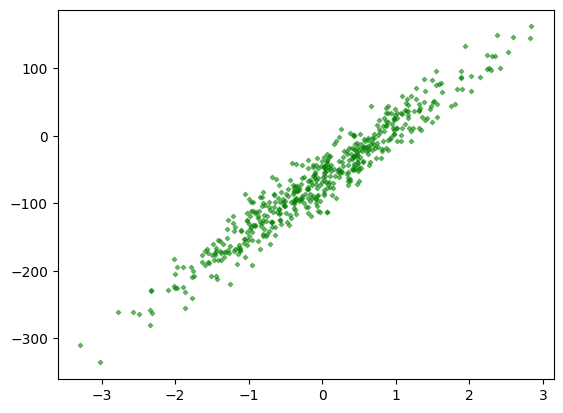

In [ ]:
plt.figure()
plt.scatter(x,y, c="g", marker="D", s=5, alpha = 0.5 )

In [ ]:
X = np.array(x)
Y = np.array(y)

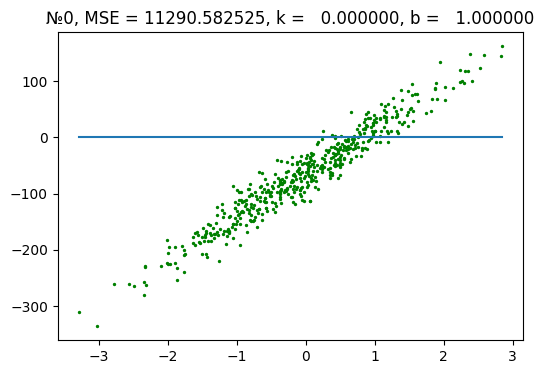

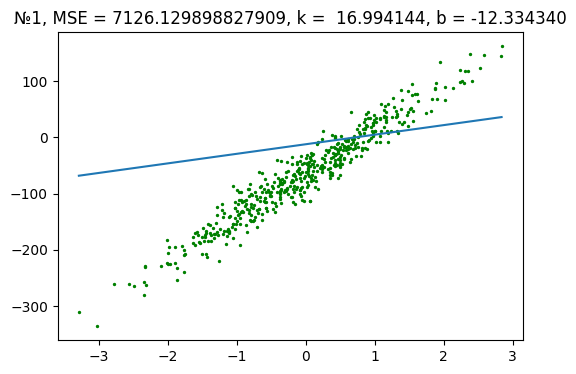

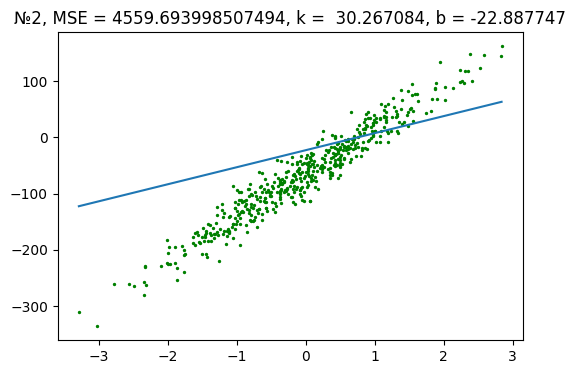

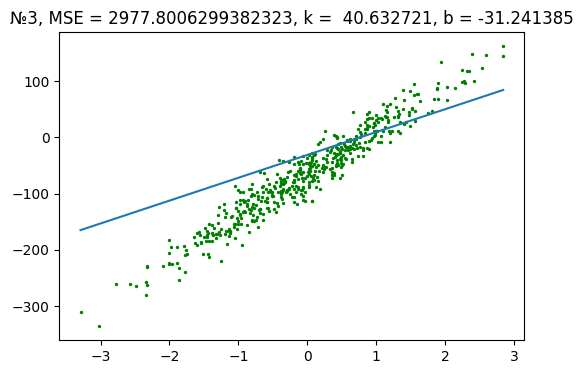

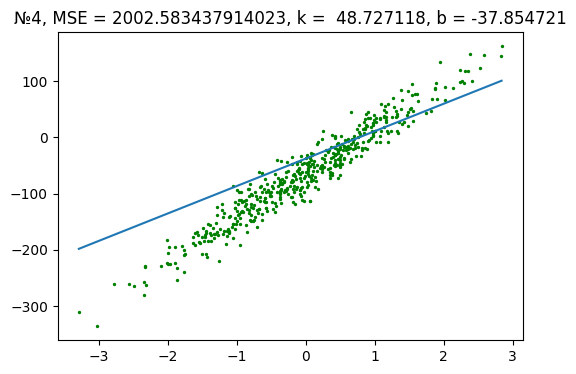

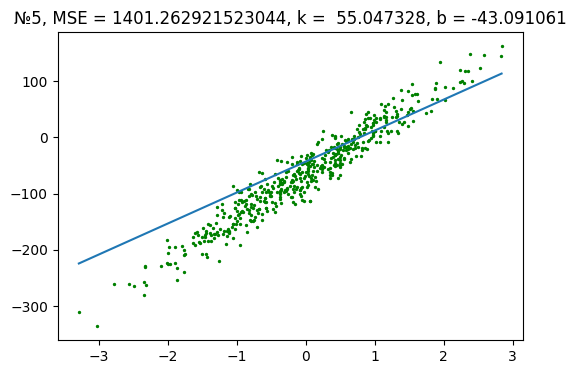

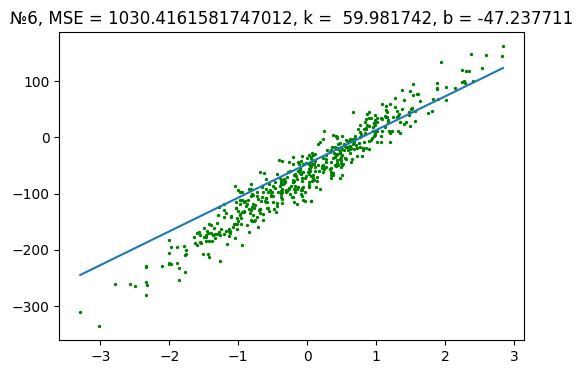

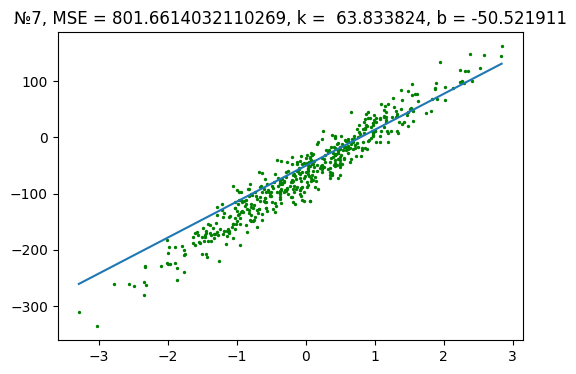

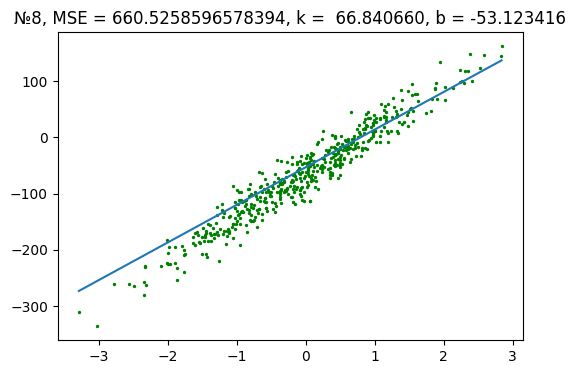

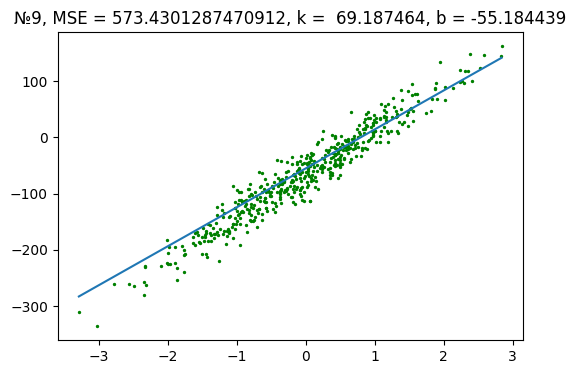

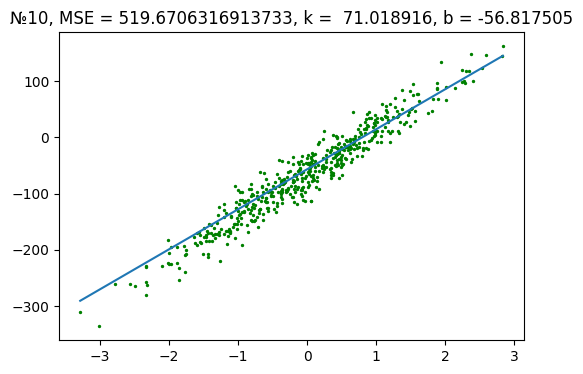

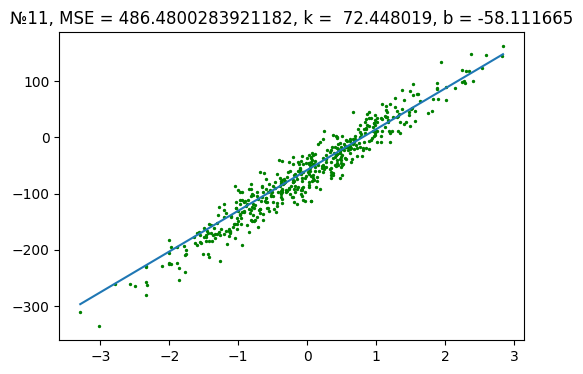

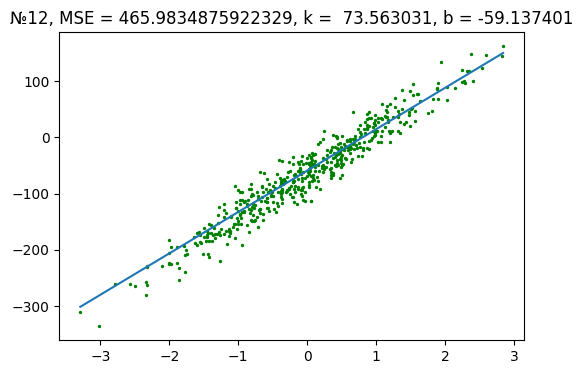

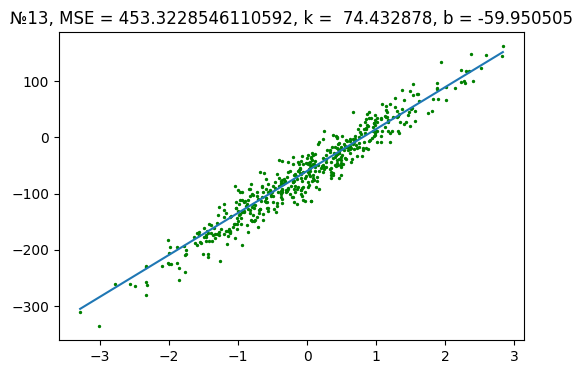

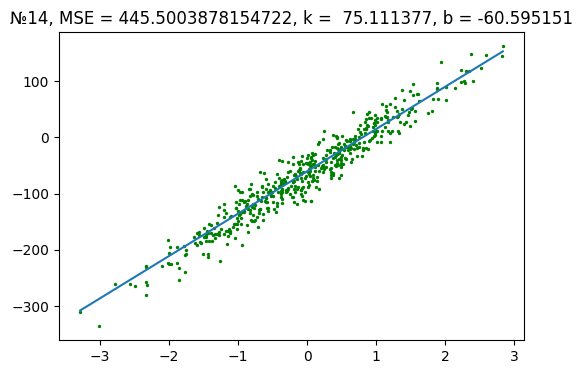

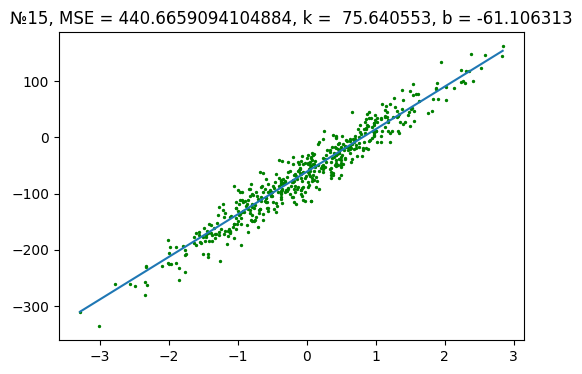

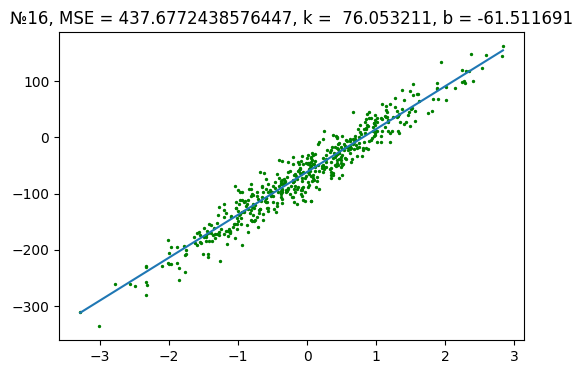

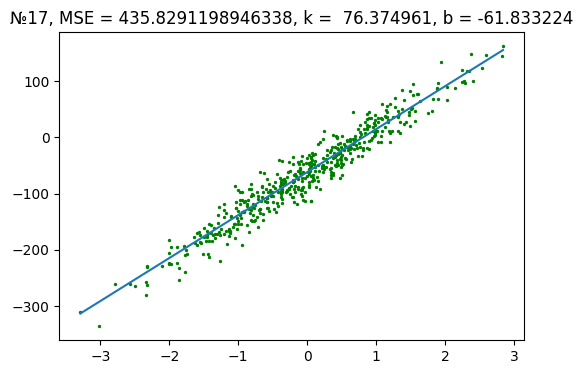

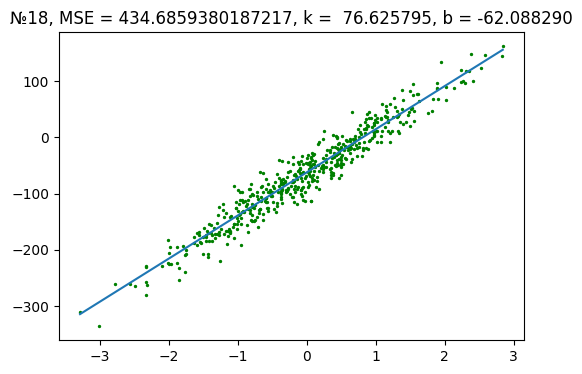

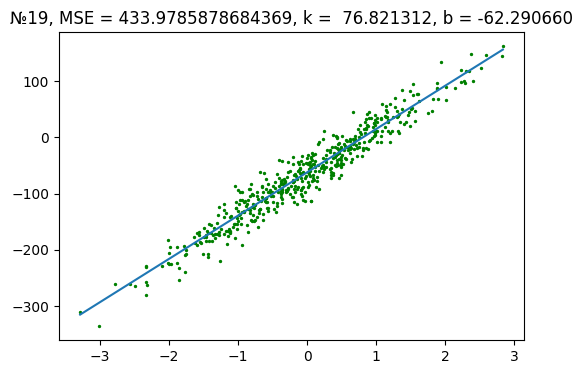

In [ ]:
k, b = 0.0, 1.0
xmin, xmax = min(X), max(X)

alpha = 0.1
N = 20
for i in range(N):
    y_pred = k*X + b

    MSE = np.sum((Y - y_pred)**2) / Y.shape[0]
    plt.figure(figsize=(6,4))
    plt.scatter(X, y, color="green", s = 2)
    plt.plot([xmin, xmax], [k*xmin + b, k*xmax + b])
    plt.title(f'№{i}, MSE = {MSE}, k = {k:10f}, b = {b:10f}' )
    plt.show()
    gk = - ( 2 * np.dot(X.T, (Y - y_pred))) / Y.shape[0]
    gb = - 2 * np.sum(Y - y_pred) / Y.shape[0]

    k = float(k - alpha * gk)
    b = b - alpha * gb

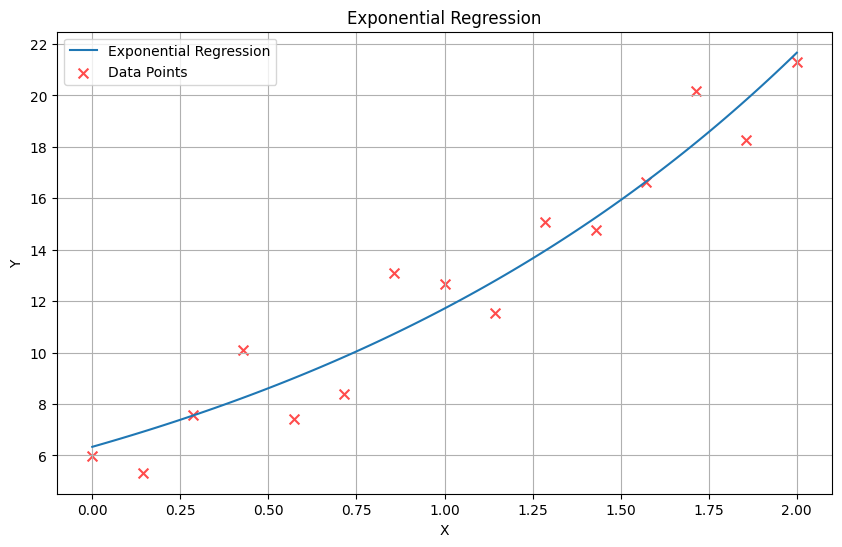

In [ ]:
from scipy.optimize import curve_fit

np.random.seed(42)
X = np.linspace(0, 2, 15)
Y = 5 * np.exp(0.8 * X) + np.random.randn(15) * 2

def exponential(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exponential, X, Y)
X1 = np.linspace(0, 2, 100)
y_pred = exponential(X1, *params)

plt.figure(figsize=(10, 6))
plt.plot(X1, y_pred, label="Exponential Regression")
plt.scatter(X, Y, c="r", marker="x", s=50, alpha=0.7, label="Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()